## Name - Aakanksha Bhagure
## Roll no.- 21102A0050
## Git link - https://github.com/aakanksha0250/Decision-Trees.git

### Iris classification

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score, roc_curve, auc , mean_squared_error
import seaborn as sns

#### Data Preparation:

In [2]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [16]:
print(X.head())
print(y.head())
print(X.describe())
print(y.value_counts())


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class          
Iris-setosa       

#### Split the data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Decision Tree classifier

In [24]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = clf.predict(X_test)


#### Evaluating Performance

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [30]:
print(iris.variables)

           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


In [32]:
# Classification Report
class_names = ['Setosa', 'Versicolor', 'Virginica']
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("\nCohen's Kappa:", kappa)


Cohen's Kappa: 1.0


In [39]:
# Extract metrics from the classification report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Print individual metrics
for class_name in class_names:
    print(f"\nMetrics for class {class_name}:")
    print(f"Precision: {report[class_name]['precision']}")
    print(f"Recall (Sensitivity): {report[class_name]['recall']}")
    print(f"F-measure: {report[class_name]['f1-score']}")

# Overall metrics
print("\nOverall metrics:")
print(f"Accuracy: {report['accuracy']}")
print(f"Macro avg precision: {report['macro avg']['precision']}")
print(f"Macro avg recall: {report['macro avg']['recall']}")
print(f"Macro avg F-measure: {report['macro avg']['f1-score']}")



Metrics for class Setosa:
Precision: 1.0
Recall (Sensitivity): 1.0
F-measure: 1.0

Metrics for class Versicolor:
Precision: 1.0
Recall (Sensitivity): 1.0
F-measure: 1.0

Metrics for class Virginica:
Precision: 1.0
Recall (Sensitivity): 1.0
F-measure: 1.0

Overall metrics:
Accuracy: 1.0
Macro avg precision: 1.0
Macro avg recall: 1.0
Macro avg F-measure: 1.0


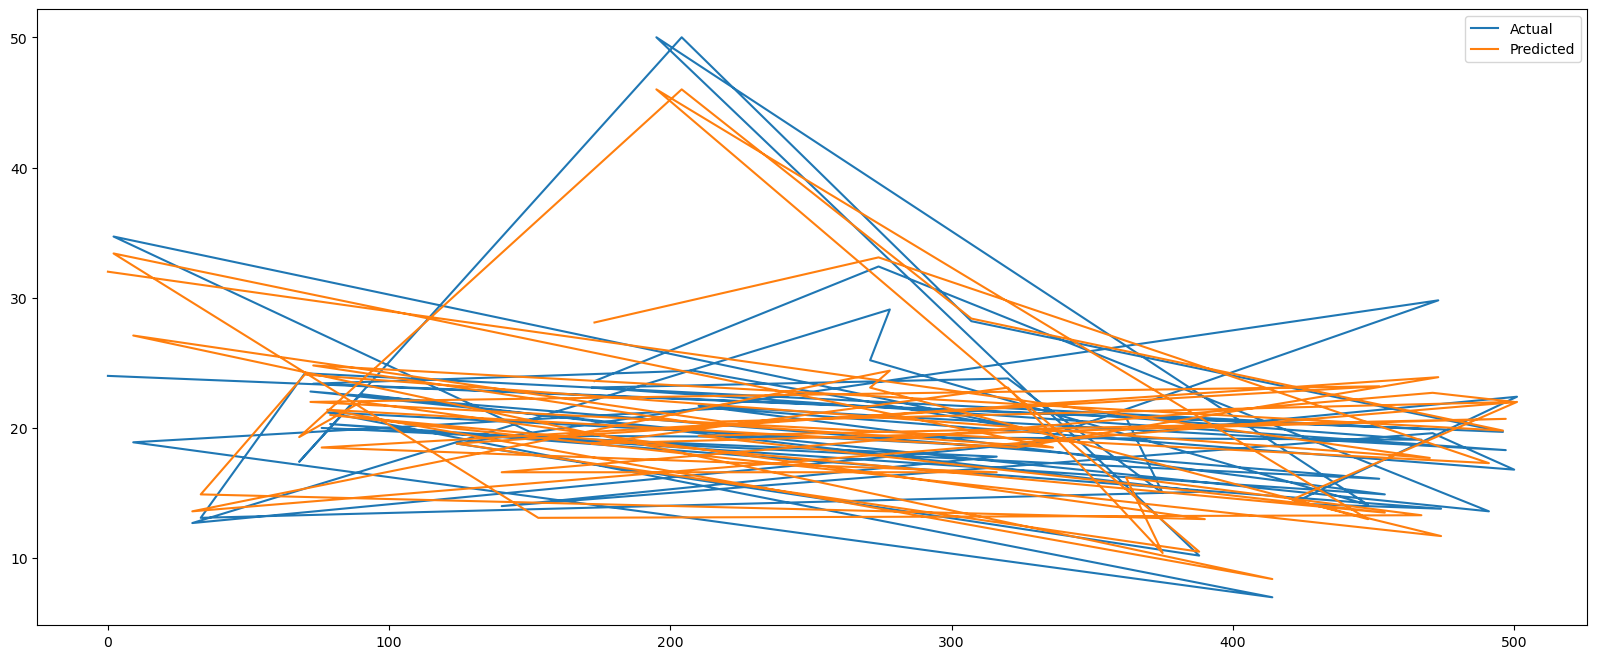

In [127]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
plt.figure(figsize=(20,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])
plt.show()

## Regression Dataset: Boston Housing

In [93]:
data1 = pd.read_csv('housing.csv', delimiter=r"\s+", header=None)
data1.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [95]:
data1.shape

(506, 14)

In [97]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [99]:
data1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

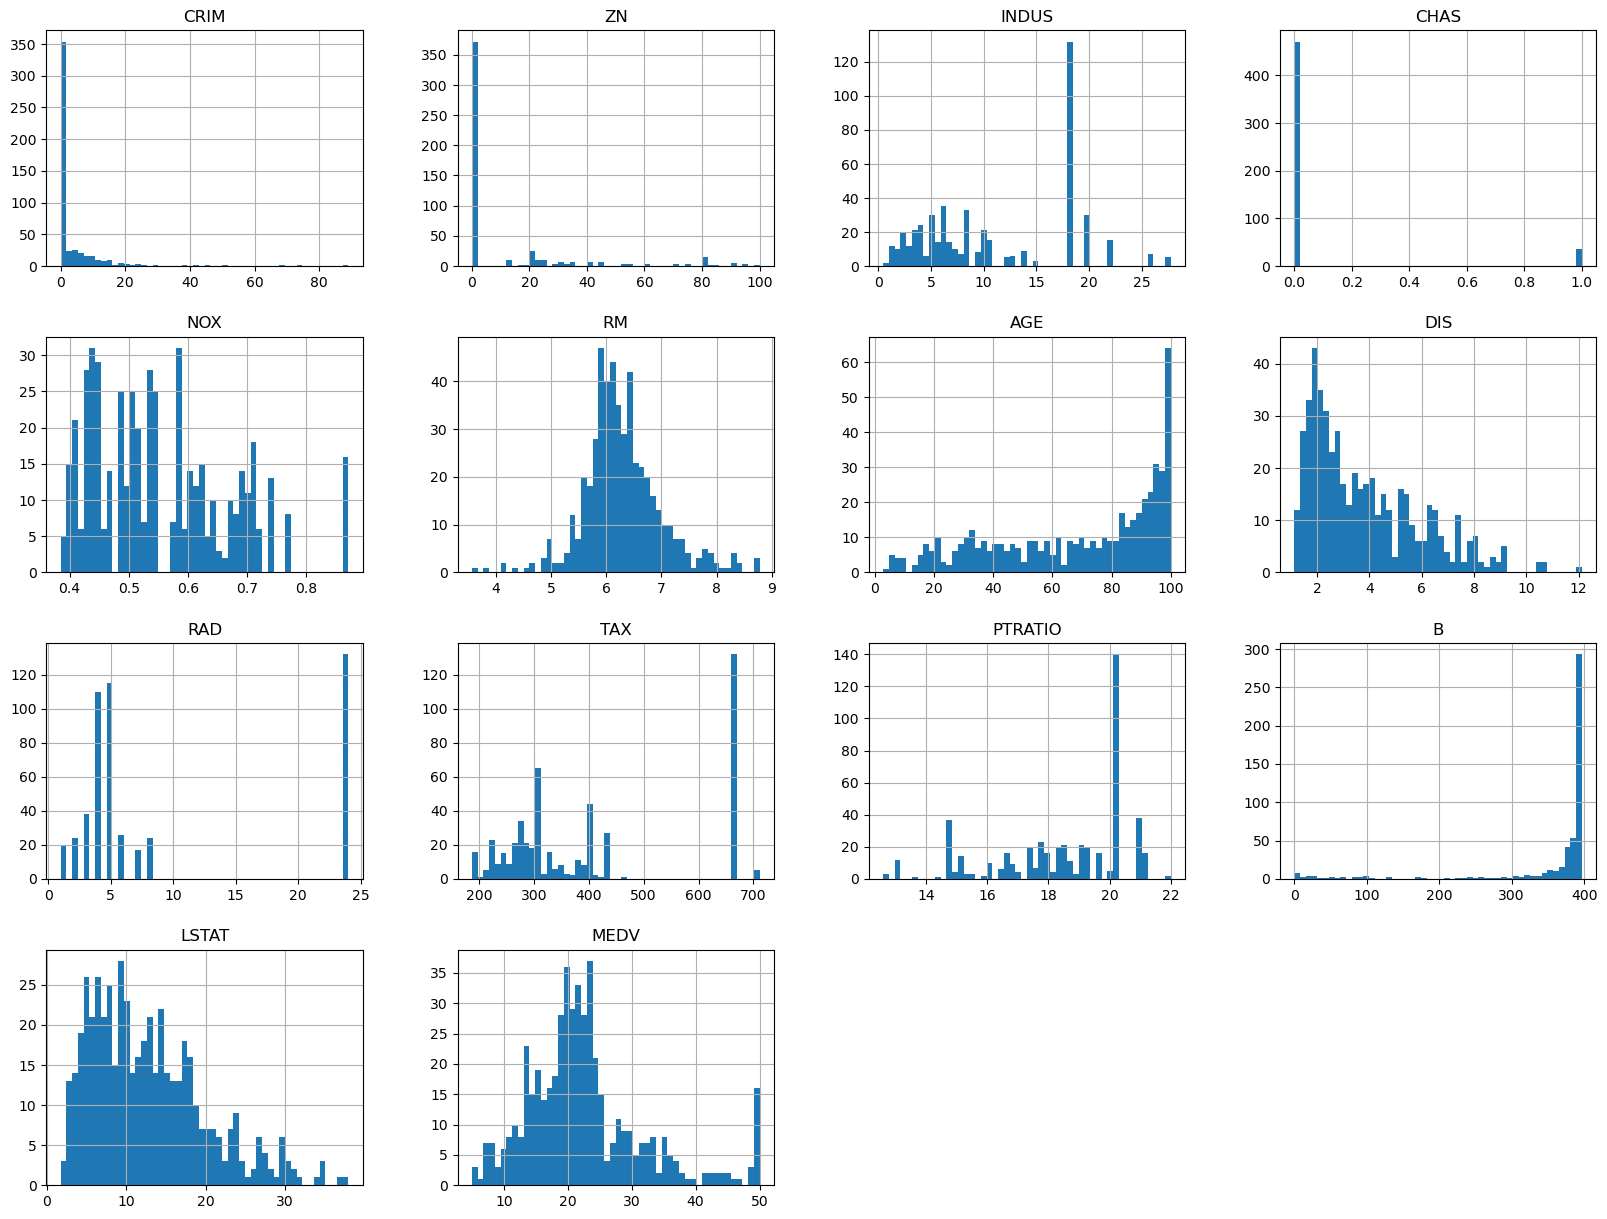

In [129]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

####  Split into training and testing sets

In [102]:
X = data1.drop('MEDV', axis=1)
y = data1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Decision Tree regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)


#### Evaluating Performance

In [112]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.416078431372549


#### Plot actual vs. predicted values.

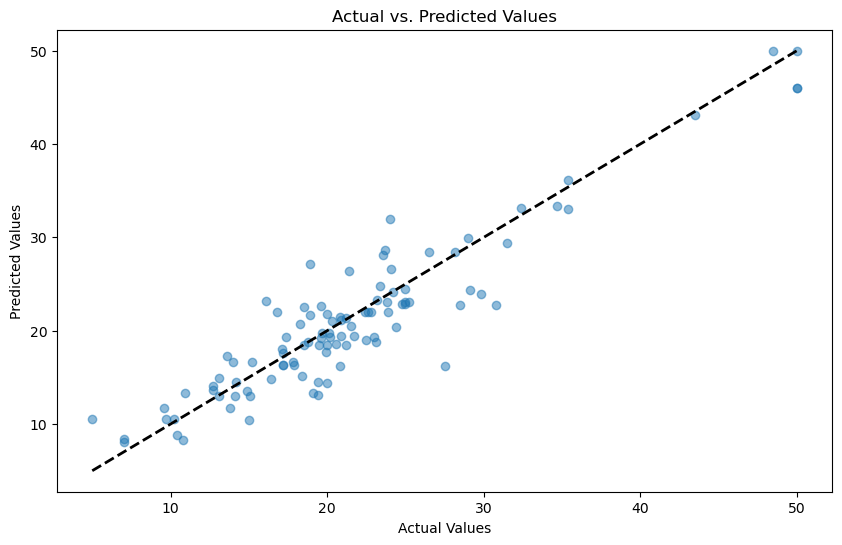

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

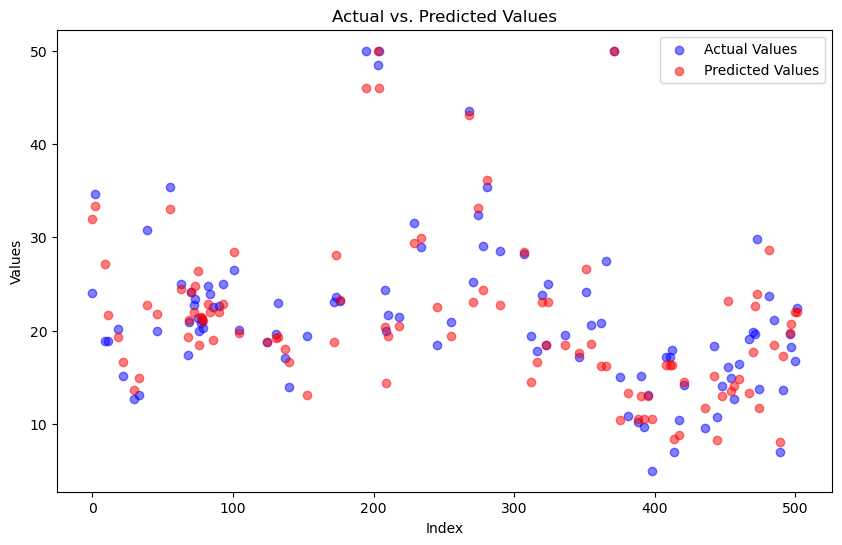

In [122]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))

plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual Values', alpha=0.5)

plt.scatter(results_df.index, results_df['Predicted'], color='red', label='Predicted Values', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()